In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

In [2]:
Customer=pd.read_excel('C:/Users/BP/Data Science/DS(Python)/3. Python Foundation Case Studies/Case Study 2 - Credit Card Case Study/Credit Card Data.xlsx')
Spend=pd.read_excel('C:/Users/BP/Data Science/DS(Python)/3. Python Foundation Case Studies/Case Study 2 - Credit Card Case Study/Credit Card Data.xlsx',sheet_name=1)
Repayment=pd.read_excel('C:/Users/BP/Data Science/DS(Python)/3. Python Foundation Case Studies/Case Study 2 - Credit Card Case Study/Credit Card Data.xlsx',sheet_name=2)

In [3]:
Credit1=pd.merge(left=Customer,right=Spend,how='outer',left_on='Customer',right_on='Customer')
Credit_Card=pd.merge(left=Credit1,right=Repayment,how='outer',left_on='Customer',right_on='Customer')

In [4]:
Credit_Card.Age=round(Credit_Card.Age).astype('int64')

In [5]:
Credit_Card.shape

(37284, 15)

### 1. In the above dataset,
### a. In case age is less than 18, replace it with mean of age values

In [6]:
Credit_Card.Age[Credit_Card.Age<18]=Credit_Card.Age.mean()

<ipython-input-6-e092d3d0b883>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Credit_Card.Age[Credit_Card.Age<18]=Credit_Card.Age.mean()


### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.
### (customer’s limit provided in acquisition table is the per transaction limit on his card)

In [7]:
Credit_Card.Amount_x[Credit_Card.Amount_x>Credit_Card.Limit]=0.5*Customer.Limit

<ipython-input-7-17aa77a19d39>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Credit_Card.Amount_x[Credit_Card.Amount_x>Credit_Card.Limit]=0.5*Customer.Limit


### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.


In [8]:
Credit_Card.Amount_y[Credit_Card.Amount_y>Credit_Card.Limit]=Credit_Card.Limit

<ipython-input-8-8ed61fc1cafa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Credit_Card.Amount_y[Credit_Card.Amount_y>Credit_Card.Limit]=Credit_Card.Limit


### 2. From the above dataset create the following summaries:
### a. How many distinct customers exist?

In [9]:
distinct_customers=Credit_Card.Customer.loc[-Credit_Card.Customer.duplicated()].count()

In [10]:
distinct_customers

100

### 2b. How many distinct categories exist?

In [11]:
City_dist=Credit_Card.City.loc[-Credit_Card.City.duplicated()].count()
Product_dist=Credit_Card.Product.loc[-Credit_Card.Product.duplicated()].count()
Company_dist=Credit_Card.Company.loc[-Credit_Card.Company.duplicated()].count()
Segment_dist=Credit_Card.Segment.loc[-Credit_Card.Segment.duplicated()].count()
Type_dist=Credit_Card.Type.loc[-Credit_Card.Type.duplicated()].count()
print('The distinct city are:',City_dist)
print('The distinct Product are:',Product_dist)
print('The distinct Company are:',Company_dist)
print('The distinct Segment are:',Segment_dist)
print('The distinct Type are:',Type_dist)

The distinct city are: 8
The distinct Product are: 3
The distinct Company are: 41
The distinct Segment are: 5
The distinct Type are: 15


### 2c. What is the average monthly spend by customers?

In [12]:
Credit_Card['Month_x_Month']=pd.to_datetime(Credit_Card.Month_x,format='%m').apply(lambda x: x.strftime('%m')).astype('int64')

In [13]:
Credit_Card.groupby(['Customer','Month_x'])[['Amount_x']].mean().reset_index()

,Customer,Month_x,Amount_x
0,A1,2004-01-03,467747.601626
1,A1,2004-01-12,391609.094108
2,A1,2004-01-15,86878.954735
3,A1,2004-01-25,191132.253322
4,A1,2004-02-05,480587.006754
...,...,...,...
1252,A95,2004-01-15,281975.205712
1253,A96,2004-01-25,94369.178802
1254,A97,2004-01-12,NaN
1255,A98,2004-01-03,NaN


### 2d. What is the average monthly repayment by customers?

In [14]:
Credit_Card.groupby(['Customer','Month_y'])[['Amount_y']].mean().reset_index()

,Customer,Month_y,Amount_y
0,A1,2004-01-03,131778.688758
1,A1,2004-01-12,274665.145247
2,A1,2004-01-15,327829.902766
3,A1,2004-01-25,452865.826385
4,A1,2004-02-05,276490.143237
...,...,...,...
1276,A95,2004-01-15,381370.442582
1277,A96,2004-01-25,100000.000000
1278,A97,2004-01-12,10000.000000
1279,A98,2004-01-03,10001.000000


### 2e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?
### (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment
### – Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [15]:
Credit_Card['Profit']=Credit_Card.Amount_y-Credit_Card.Amount_x

In [16]:
Credit_Card['pos_profit']= np.where(Credit_Card.Profit<0,0,Credit_Card.Profit)*0.029

In [17]:
Credit_Card.groupby(['Month_x'])[['pos_profit']].sum()

,pos_profit
Month_x,
2004-01-03,1.811599e+06
2004-01-12,2.504053e+06
2004-01-15,2.798867e+06
2004-01-25,1.897987e+06
2004-02-05,1.013834e+06
...,...
2006-09-03,1.174161e+06
2006-10-03,1.084592e+06
2006-11-03,3.862930e+05


### 2f. What are the top 5 product types?

In [18]:
Credit_Card.groupby(['Type'])[['Amount_x']].sum().sort_values(by='Amount_x',ascending=False).head(5)

,Amount_x
Type,
CAMERA,7.400150e+08
PETRO,7.358022e+08
FOOD,6.006429e+08
AIR TICKET,5.964113e+08
TRAIN TICKET,4.766013e+08


### 2g. Which city is having maximum spend?

In [19]:
Credit_Card.groupby(['City'])[['Amount_x']].sum().sort_values(by='Amount_x',ascending=False).head(1)

,Amount_x
City,
COCHIN,1.186547e+09


### 2h. Which age group is spending more money?

In [20]:
from numpy import where as IF
Credit_Card['Age_Group'] = IF((Credit_Card.Age>13) & (Credit_Card.Age<=19),"Teenager",
   IF((Credit_Card.Age>=20) & (Credit_Card.Age<=40),"Young",
      IF((Credit_Card.Age>=41) & (Credit_Card.Age<=65),"Middle",
         IF((Credit_Card.Age>=66) & (Credit_Card.Age<=80),"Senior","Old"))))

In [21]:
Credit_Card.groupby(['Age_Group'])[['Amount_x']].sum().sort_values(by='Amount_x',ascending=False)

,Amount_x
Age_Group,
Young,3.586205e+09
Middle,1.349335e+09
Senior,5.996974e+08
Teenager,1.823957e+07


In [22]:
### for all age
Credit_Card.groupby(['Age'])[['Amount_x']].sum().sort_values(by='Amount_x',ascending=False)

,Amount_x
Age,
34.66664,2.142350e+09
46.00000,3.154374e+08
69.00000,2.990035e+08
59.00000,2.693265e+08
52.00000,2.653723e+08
56.00000,2.562001e+08
28.00000,2.153547e+08
31.00000,2.105190e+08
38.00000,2.056526e+08


### 2i. Who are the top 10 customers in terms of repayment?

In [23]:
Credit_Card.groupby(['Customer'])[['Amount_y']].sum().sort_values(by='Amount_y').head(10)

,Amount_y
Customer,
A97,10000.000000
A98,10001.000000
A99,10002.000000
A83,10002.000000
A85,23879.870661
A78,37529.729890
A69,40000.000000
A70,40004.000000
A71,40008.000000


### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical
### representation for the same.

In [24]:
from datetime import datetime

In [25]:
Credit_Card['Month_x_year']=pd.to_datetime(Credit_Card.Month_x,format='%Y').apply(lambda x: x.strftime('%Y')).astype('int64')

In [26]:
Credit_Card.groupby(['City','Product','Month_x_year'])[['Amount_x']].sum()

Amount_x
City       Product  Month_x_year              
BANGALORE  Gold     2004          2.670055e+08
                    2005          4.174030e+08
                    2006          3.500129e+08
           Platimum 2004          1.710295e+06
                    2005          5.032496e+06
...                                        ...
TRIVANDRUM Platimum 2005          1.032663e+08
                    2006          6.409920e+07
           Silver   2004          1.309035e+06
                    2005          4.229643e+06
                    2006          1.587606e+06

[72 rows x 1 columns]

In [27]:
Grap = Credit_Card.groupby(['City','Product','Month_x_year'])[['Amount_x']].sum().reset_index()

<AxesSubplot:xlabel='Month_x_year'>

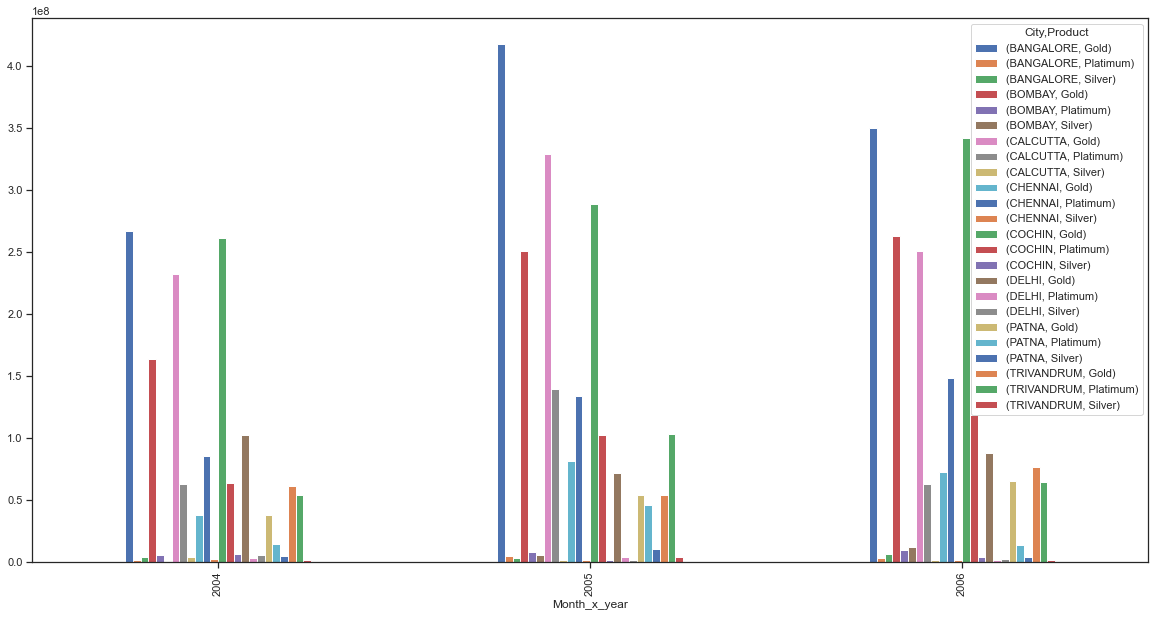

In [28]:
Grap.pivot_table(index='Month_x_year', columns=['City','Product'], values='Amount_x').plot(kind='bar',figsize=(20,10))

### 4. Create graphs for
### a. Monthly comparison of total spends, city wise


In [29]:
Credit_Card['Month']=pd.to_datetime(Credit_Card.Month_x,format='%m').apply(lambda x:x.strftime('%m')).astype('int64')

In [30]:
Credit_Card['Month']

0        1
1        1
2        1
3        1
4        1
        ..
37279    1
37280    1
37281    1
37282    1
37283    1
Name: Month, Length: 37284, dtype: int64

<AxesSubplot:xlabel='City'>

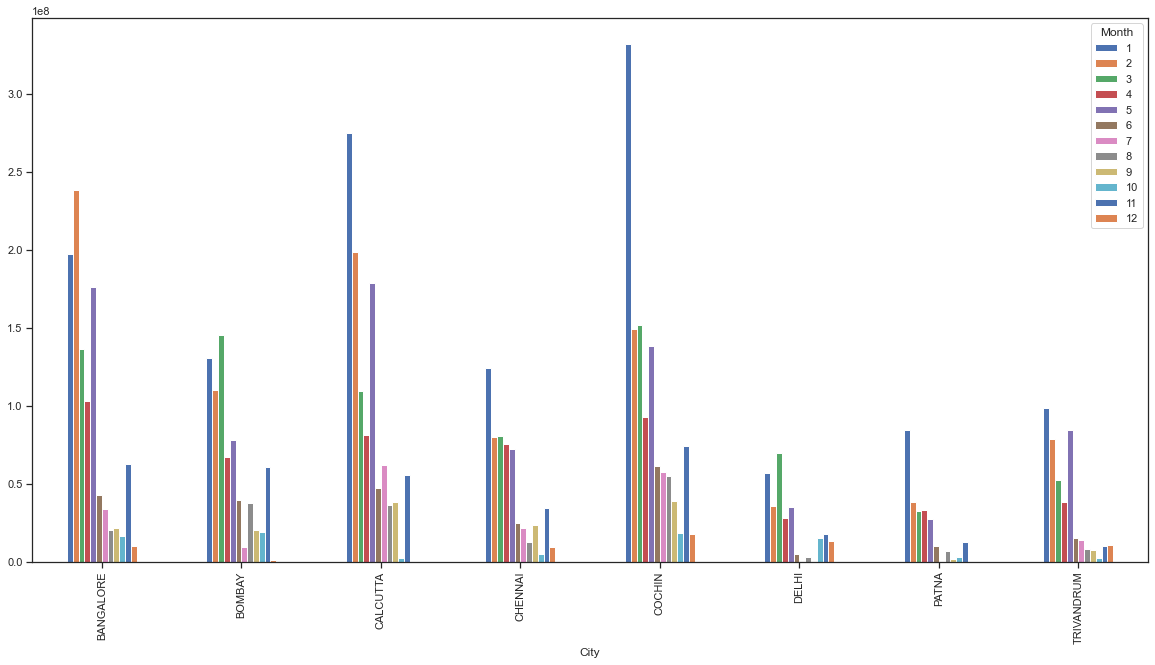

In [31]:
Month_graph=Credit_Card.groupby(['Month','City'])[['Amount_x']].sum()
Month_graph.pivot_table(index='City',columns='Month',values='Amount_x').plot(kind='bar',figsize=(20,10))

### b. Comparison of yearly spend on air tickets


In [32]:
Credit_Card['air_tickets']=Credit_Card.Type[Credit_Card.Type=='AIR TICKET']

In [33]:
Airticket=Credit_Card['air_tickets'].dropna()

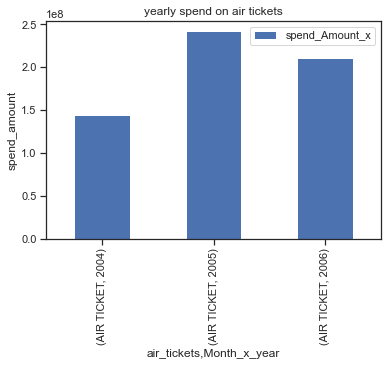

In [34]:
Credit_Card.groupby(['air_tickets','Month_x_year'])[['Amount_x']].sum().add_prefix('spend_').plot(kind='bar')
plt.ylabel('spend_amount')
plt.title('yearly spend on air tickets')
plt.show()

### c. Comparison of monthly spend for each product (look for any seasonality
### that exists in terms of spend)

In [35]:
Monthly_spend=Credit_Card.groupby(['Month','Product'])[['Amount_x']].sum()

<AxesSubplot:xlabel='Month'>

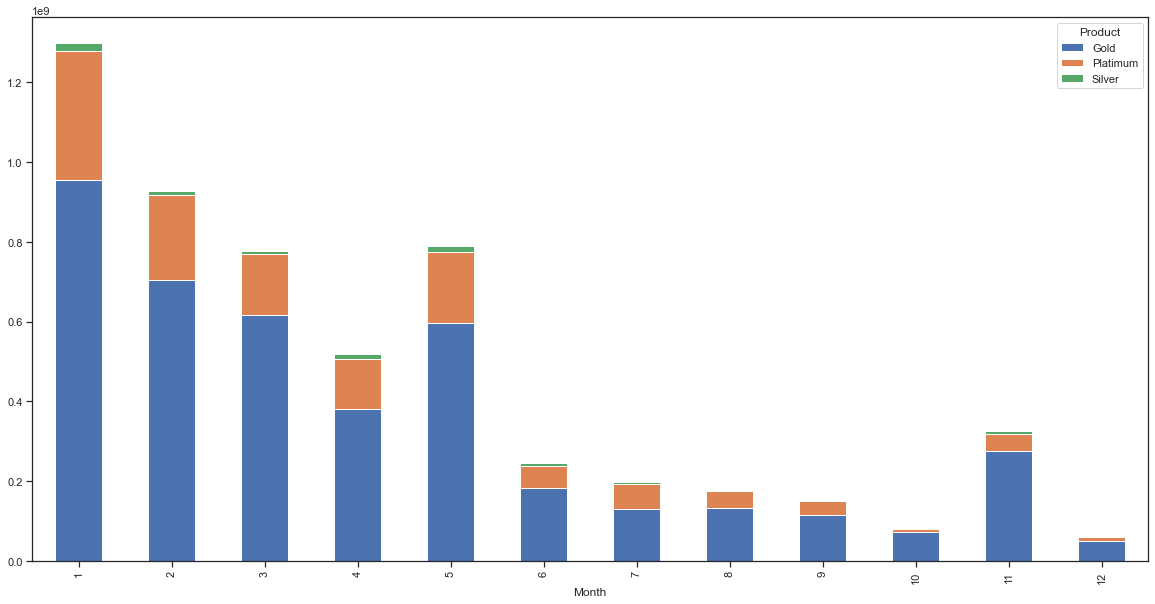

In [36]:
Monthly_spend.pivot_table(index='Month',columns='Product',values='Amount_x').plot(kind='bar',stacked=True,figsize=(20,10))

### 5. Write user defined PYTHON function to perform the following analysis:
### You need to find top 10 customers for each city in terms of their repayment amount by
### different products and by different time periods i.e. year or month. The user should be able
### to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the
### function should automatically take these inputs while identifying the top 10 customers.

In [37]:
Credit_Card['Month_y_year']=pd.to_datetime(Credit_Card.Month_y,format='%Y').apply(lambda x: x.strftime('%Y'))    

In [38]:
Credit_Card

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_x,...,Month_y,Amount_y,Month_x_Month,Profit,pos_profit,Age_Group,Month_x_year,Month,air_tickets,Month_y_year
0,1,A1,34.00000,BANGALORE,Gold,500000,C1,Self Employed,1,2004-01-12,...,2004-01-12,338932.141919,1,-5122.838893,0.000000,Young,2004,1,NaN,2004
1,1,A1,34.00000,BANGALORE,Gold,500000,C1,Self Employed,1,2004-01-12,...,2004-01-03,131778.688758,1,-212276.292055,0.000000,Young,2004,1,NaN,2004
2,1,A1,34.00000,BANGALORE,Gold,500000,C1,Self Employed,1,2004-01-12,...,2004-01-15,485981.516736,1,141926.535923,4115.869542,Young,2004,1,NaN,2004
3,1,A1,34.00000,BANGALORE,Gold,500000,C1,Self Employed,1,2004-01-12,...,2004-01-25,452865.826385,1,108810.845572,3155.514522,Young,2004,1,NaN,2004
4,1,A1,34.00000,BANGALORE,Gold,500000,C1,Self Employed,1,2004-01-12,...,2005-01-17,154684.838196,1,-189370.142617,0.000000,Young,2004,1,NaN,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37279,96,A96,71.00000,CHENNAI,Silver,100000,C19,Salaried_Pvt,98,2004-01-25,...,2004-01-25,100000.000000,1,5630.821198,163.293815,Senior,2004,1,NaN,2004
37280,97,A97,70.00000,TRIVANDRUM,Platimum,10000,C20,Govt,99,2004-01-12,...,2004-01-12,10000.000000,1,NaN,NaN,Senior,2004,1,NaN,2004
37281,98,A98,21.00000,CALCUTTA,Platimum,10001,C21,Normal Salary,100,2004-01-03,...,2004-01-03,10001.000000,1,NaN,NaN,Young,2004,1,NaN,2004
37282,99,A99,52.00000,CALCUTTA,Platimum,10002,C22,Self Employed,101,2004-01-15,...,2004-01-15,10002.000000,1,NaN,NaN,Middle,2004,1,AIR TICKET,2004


In [39]:
def Top10Customer(x,y):
    return Credit_Card.groupby(['Customer','City',Credit_Card.Product[Credit_Card.Product==x],Credit_Card.Month_y_year[Credit_Card.Month_y_year==y]])[['Amount_y']].sum().sort_values(by='Amount_y',ascending=False).reset_index().head(10)

In [40]:
Top10Customer(input('Product name(Gold/Silver/Platimum):'),input('Time period(2004/2005/2006):'))

Product name(Gold/Silver/Platimum):Gold
Time period(2004/2005/2006):2006


,Customer,City,Product,Month_y_year,Amount_y
0,A61,COCHIN,Gold,2006,1.259300e+08
1,A30,BANGALORE,Gold,2006,1.120655e+08
2,A60,CALCUTTA,Gold,2006,1.107882e+08
3,A14,BANGALORE,Gold,2006,9.958477e+07
4,A43,BANGALORE,Gold,2006,9.432969e+07
5,A12,BOMBAY,Gold,2006,9.104474e+07
6,A28,TRIVANDRUM,Gold,2006,8.717610e+07
7,A29,CALCUTTA,Gold,2006,8.005926e+07
8,A44,DELHI,Gold,2006,7.857811e+07
9,A27,CHENNAI,Gold,2006,7.835803e+07
